In [73]:
import torch
from d2l import torch as d2l
import random
import numpy as np
from torch.utils import data

In [2]:
w_true = torch.tensor([3.5, -5.3, 6.6])
b_true = 6.6
sample_size = 1000

features = torch.normal(5, 10, (sample_size, 3))
labels = torch.matmul(features, w_true) + b_true
labels = labels + torch.normal(0, 0.01, (labels.shape))

print(labels.shape)
print(features.shape)

torch.Size([1000])
torch.Size([1000, 3])


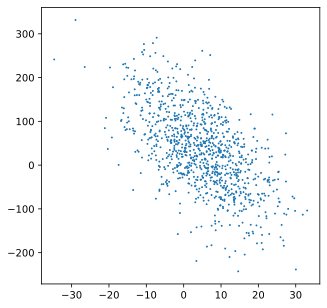

In [3]:
d2l.set_figsize((5, 5))
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1)

In [ ]:
# 迭代batch
def itera_batch(X, y, batch_size):
    # 打乱样本索引
    index = list(range(sample_size))
    random.shuffle(index)
    # 返回batch
    if sample_size % batch_size == 0:
        range_num = sample_size // batch_size
    else:
        range_num = sample_size // batch_size + 1
    for i in range(range_num):
        X_batch = X[index[i*batch_size:min(i*batch_size+batch_size, sample_size)]]
        y_batch = y[index[i*batch_size:min(i*batch_size+batch_size, sample_size)]]
        yield X_batch, y_batch
        
  

# 推断函数
def inference(w, b, featrues):
    return torch.matmul(featrues.float(), w.float())+b
# 损失函数
def square_loss(y_true, y_pre):
    return (y_pre - y_true)**2/2
# 更新参数
def sgd(w_pre, b_pre, lr, batch_size):
    # 下面的计算不被记录到计算图中
    with torch.no_grad():
        w_pre -= w_pre.grad*lr/batch_size
        b_pre -= b_pre.grad*lr/batch_size
        w_pre.grad.zero_()
        b_pre.grad.zero_()

# 进行模型训练
w_pre = torch.tensor([1.0, 1.0, 1.0], requires_grad=True)
b_pre = torch.tensor([7.0], requires_grad=True)
lr = 0.001
batch_size = 200
epoch_size = 100

for i in range(epoch_size):
    print(f"epoch {i+1}:")
    itera_data = itera_batch(features, labels, batch_size)
    for X, y in itera_data:
        # 正向传播，计算损失函数
        y_pre = inference(w_pre, b_pre, X)
        loss = square_loss(y, y_pre).sum()
        # 反向传播，计算梯度
        loss.backward()
        # 更新参数
        sgd(w_pre, b_pre, lr, batch_size)
    print(f"loss: {loss}")
    print(w_pre)
    print(b_pre)
    print()


# 总结一下整个步骤
# 为什么b 没有收敛：b 的大小对整个损失函数的影响较小，每次的梯度很小


# 参数的初始值会影响模型的收敛
# 学习率越大，越不容易陷入局部最优，但也不容易收敛

epoch 1:
loss: 287596.09375
tensor([ 2.1282, -1.4645,  3.4263], requires_grad=True)
tensor([7.0449], requires_grad=True)

epoch 2:
loss: 88818.7890625
tensor([ 2.7225, -2.9971,  4.7741], requires_grad=True)
tensor([7.0622], requires_grad=True)

epoch 3:
loss: 38733.34765625
tensor([ 3.0512, -3.9258,  5.5402], requires_grad=True)
tensor([7.0700], requires_grad=True)

epoch 4:
loss: 16607.12109375
tensor([ 3.2334, -4.4879,  5.9769], requires_grad=True)
tensor([7.0731], requires_grad=True)

epoch 5:
loss: 5283.58544921875
tensor([ 3.3379, -4.8235,  6.2300], requires_grad=True)
tensor([7.0737], requires_grad=True)

epoch 6:
loss: 1766.6842041015625
tensor([ 3.4000, -5.0216,  6.3786], requires_grad=True)
tensor([7.0737], requires_grad=True)

epoch 7:
loss: 660.1655883789062
tensor([ 3.4354, -5.1399,  6.4648], requires_grad=True)
tensor([7.0730], requires_grad=True)

epoch 8:
loss: 228.4281005859375
tensor([ 3.4556, -5.2106,  6.5146], requires_grad=True)
tensor([7.0720], requires_grad=True)
